In [2]:
import os
import h5py
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
#dataset_path='/wclustre/novapro/R19-11-18-Prod5_fullset/mbaird42-trimmed-H5s-for-CVN-training/FD_nominal/FHC_nonswap/'
dataset_path='/wclustre/nova/users/rafaelma2/NOvA-Clean/datos/raw/'
files=os.listdir(dataset_path)
files = [dataset_path+f for f in files]
#files=files[0:2]

In [7]:
files[0]

'/wclustre/nova/users/rafaelma2/NOvA-Clean/datos/raw/trimmed_FD_nominal_FHC_nonswap.11_of_2000.h5'

In [4]:
def load_nova(filelist):
    
    for filename in tqdm(filelist):
        with h5py.File(filename, 'r') as h5_file, \
                h5py.File(os.path.join('/wclustre/nova/users/rafaelma2/NOvA-Clean/datos/procesados/demos_slice/', os.path.basename(filename)), 'w') as hf:

            labels = h5_file['label']
            energies = h5_file['energy']
            cvn_maps = h5_file['cvnmap']
            cvn_obj_maps = h5_file['cvnobjmap']
            cvn_lab_maps = h5_file['cvnlabmap']

            #adding run info
            runs = h5_file['run']
            subruns = h5_file['subrun']
            cycles = h5_file['cycle']
            events = h5_file['event']
            slices = h5_file['slice']

            num_events = labels.shape[0]
            events_to_keep = np.ones(num_events, dtype=bool)

            # Filtrar los eventos que no cumplen las condiciones
            events_to_keep &= labels[:] != 15# no cosmics
            events_to_keep &= energies[:] <= 10# no crazy events
            events_to_keep &= np.max(cvn_obj_maps[:], axis=1) <= 5# no more of 5 particles
            
            events_to_keep &= np.sum(np.isin(cvn_lab_maps[:], [5]), axis=1) >= 10 #no < 5 hits pions
            events_to_keep &= np.sum(np.isin(cvn_lab_maps[:], [4]), axis=1) == 0 #no id 4
            events_to_keep &= np.sum(cvn_lab_maps[:] > 7, axis=1) ==0 #no id > 7
            
            events_to_keep &= (np.any(np.sum(np.isin(cvn_obj_maps[:], [1]), axis=1) >= 5)) or (np.any(np.sum(np.isin(cvn_obj_maps[:], [1]), axis=1) == 0))
            events_to_keep &= (np.any(np.sum(np.isin(cvn_obj_maps[:], [2]), axis=1) >= 5)) or (np.any(np.sum(np.isin(cvn_obj_maps[:], [2]), axis=1) == 0))
            events_to_keep &= (np.any(np.sum(np.isin(cvn_obj_maps[:], [3]), axis=1) >= 5)) or (np.any(np.sum(np.isin(cvn_obj_maps[:], [3]), axis=1) == 0))
            events_to_keep &= (np.any(np.sum(np.isin(cvn_obj_maps[:], [4]), axis=1) >= 5)) or (np.any(np.sum(np.isin(cvn_obj_maps[:], [4]), axis=1) == 0))
            events_to_keep &= (np.any(np.sum(np.isin(cvn_obj_maps[:], [5]), axis=1) >= 5)) or (np.any(np.sum(np.isin(cvn_obj_maps[:], [5]), axis=1) == 0))

             # Crear matrices filtradas de eventos
            labels = labels[events_to_keep]
            energies = energies[events_to_keep]
            cvn_maps = cvn_maps[events_to_keep]
            cvn_obj_maps = cvn_obj_maps[events_to_keep]
            cvn_lab_maps = cvn_lab_maps[events_to_keep]

            runs=runs[events_to_keep]
            subruns=subruns[events_to_keep]
            cycles=cycles[events_to_keep]
            events=events[events_to_keep]
            slices=slices[events_to_keep]
            # Guardar los datos filtrados en un archivo de salida
            hf.create_dataset('label', data=labels, compression='gzip')
            hf.create_dataset('energy', data=energies, compression='gzip')
            hf.create_dataset('cvnmap', data=cvn_maps, compression='gzip')
            hf.create_dataset('cvnobjmap', data=cvn_obj_maps, compression='gzip')
            hf.create_dataset('cvnlabmap', data=cvn_lab_maps, compression='gzip')
            
            hf.create_dataset('run', data=runs, compression='gzip')
            hf.create_dataset('subrun', data=subruns, compression='gzip')
            hf.create_dataset('cycle', data=cycles, compression='gzip')
            hf.create_dataset('event', data=events, compression='gzip')
            hf.create_dataset('slice', data=slices, compression='gzip')
            
load_nova(files)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.42s/it]


In [4]:
h5_file=h5py.File(files[0], 'r')
#cvn_lab_maps = h5_file['cvnlabmap']
#cvn_lab_maps[:].shape

In [6]:
h5_file.keys()


<KeysViewHDF5 ['MetaData', 'neutrino', 'neutrino.beam', 'neutrino.genVersion', 'neutrino.michel', 'neutrino.prefsi', 'neutrino.prefsi.primList', 'neutrino.prim', 'neutrino.prim.daughterEnergies', 'neutrino.prim.daughterlist', 'neutrino.rwgt.geant4', 'neutrino.rwgt.geant4.neutron_univ', 'neutrino.rwgt.geant4.piminus_univ', 'neutrino.rwgt.geant4.piplus_univ', 'neutrino.rwgt.geant4.proton_univ', 'neutrino.rwgt.genie', 'neutrino.rwgt.ppfx', 'neutrino.rwgt.ppfx.vuniv', 'rec.energy.nue', 'rec.energy.nue.lid', 'rec.energy.numu', 'rec.energy.numu.bpfenergy', 'rec.energy.numu.hadclust', 'rec.energy.numu.mc', 'rec.hdr', 'rec.mc', 'rec.mc.allcosmics', 'rec.mc.allcosmics.michel', 'rec.mc.allnus', 'rec.mc.allnus.beam', 'rec.mc.allnus.genVersion', 'rec.mc.allnus.michel', 'rec.mc.allnus.prefsi', 'rec.mc.allnus.prefsi.primList', 'rec.mc.allnus.prim', 'rec.mc.allnus.prim.daughterEnergies', 'rec.mc.allnus.prim.daughterlist', 'rec.mc.allnus.rwgt.geant4', 'rec.mc.allnus.rwgt.geant4.neutron_univ', 'rec.mc.

In [16]:
h5_file=h5py.File(files[0], 'r')
rec_training_cvnmaps = h5_file['rec.training.cvnmaps']
rec_training_trainingdata = h5_file['rec.training.trainingdata']
cvnmap=rec_training_cvnmaps['cvnmap']
cvnmap.shape
rec_training_trainingdata[]

(2710, 16000)

In [ ]:
h5_file['cvnobjmap']

In [6]:
np.sum(np.isin(cvn_obj_maps[:], [1]), axis=1) >= 5

In [7]:
np.unique(cvn_obj_maps)

In [12]:
filtred=cvn_obj_maps[np.max(cvn_obj_maps[:], axis=1) <= 5]

In [13]:
np.unique(filtred)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loaded 5204 images.


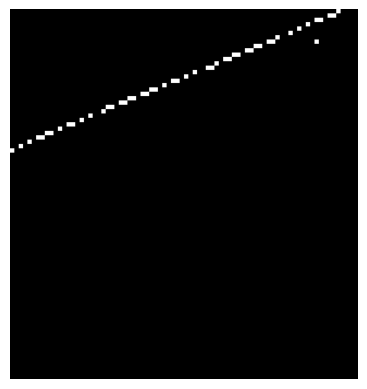

(255, 240, 0)
[]


/tmp/ipykernel_2807734/2687995834.py:135: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = to_categorical(object_array, num_classes=max_object+1).astype(dtype=np.bool)


TypeError: Invalid shape (255, 240, 0) for image data

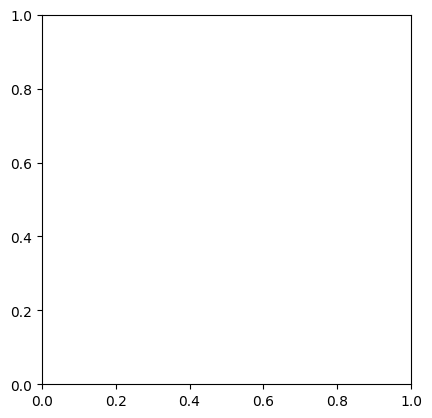

In [112]:


import h5py
import numpy as np
import torch
def to_categorical(y, num_classes=None, dtype="float32"):
    y = np.array(y, dtype="int")
    input_shape = y.shape

    # Shrink the last dimension if the shape is (..., 1).
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])

    y = y.reshape(-1)
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical


#from .utils import *


# A class for loading nova images from numpy arrays in an hdf5 file
class novaDataset():
    def __init__(self, files):
        self._image_ids = []
        self.image_info = []
        self.load_nova(files)
        
    # Load the nova classes, and set the the image ids
    def load_nova(self, filelist):
        n = 0  # keep tracking of the total number of events
        
        for f in filelist:
            h5 = h5py.File(f, 'r')
            
            Es = h5['rec.training.trainingdata']['nuenergy'][:]
            object_arrays = h5['rec.training.cvnmaps']['cvnobjmap'][:]
            

            for i, ( E,object_array) in enumerate(zip( Es,object_arrays)):
                
                if E > 10:  # omit real crazy events
                    continue
                if np.max(object_array)>5:
                    continue
                # use both x and y views together
                self.add_image('NOvA', n, f, idx=i, view='X')
                n += 1
                self.add_image('NOvA', n, f, idx=i, view='Y')
                n += 1
            h5.close()

        print('Loaded', n, 'images.')


    # Transform the 1D pixelmap array to one of the views
    def transform_pm(self, pm, view):
        # if pixel map geometry changes so will this
        newpm = pm.reshape(2, 100, 80)
        if view == 'X':
            return newpm[0]
        else:
            return newpm[1]
    def add_image(self, source, image_id, path, **kwargs):
        image_info = {
            "id": image_id,
            "source": source,
            "path": path,
        }
        image_info.update(kwargs)
        self.image_info.append(image_info)
    
    # Useful for visualizing results
    def load_image_BonW(self, image_id):
        info = self.image_info[image_id]
        hf = h5py.File(info['path'], 'r')
        pm = hf['rec.training.cvnmaps']['cvnmap'][info['idx']]
        pm = self.transform_pm(pm, info['view'])
        hf.close()

        image = np.zeros(pm.shape + (3,))

        image[pm > 0] = [255, 255, 255]

        return image

    # Pixel map of the hits
    def load_image(self, image_id):
        info = self.image_info[image_id]
        hf = h5py.File(info['path'], 'r')
        pm = hf['rec.training.cvnmaps']['cvnmap'][info['idx']]

        pm = self.transform_pm(pm, info['view'])
        hf.close()

        # second channel is boolean for hit or no hit
        blue = np.zeros_like(pm)
        blue[pm > 0] = 255

        image = np.zeros(pm.shape + (3,))
        image[:, :, 0] = pm
        image[:, :, 1] = blue
        image[:, :, 2] = blue

        return self.pm_resize(image)

    # Turn each cell into 9 (3x3) and remove the last 15 planes.
    # Keeps input size under 256x256
    def pm_resize(self, image, n=3):
        return image[:-15, :].repeat(n, axis=0).repeat(n, axis=1)
        #return image[:, :].repeat(n, axis=0).repeat(n, axis=1)

    # Create the binary mask from the label and object instance of each pixel
    def load_mask(self,image_id):
        info = self.image_info[image_id]
        hf = h5py.File(info['path'],'r')
        object_array = hf['rec.training.cvnmaps']['cvnobjmap'][info['idx']]
        object_array = self.transform_pm(object_array, info['view'])
        label_array = hf['rec.training.cvnmaps']['cvnlabmap'][info['idx']]
        label_array = self.transform_pm(label_array, info['view'])
        hf.close()

        # Some objects never make it as a max contributor to any hits
        # Remove them
        max_object = np.max(object_array)
        for i in range(max_object, 0, -1):
            if object_array[object_array==i].shape[0]==0:
                object_array[object_array >= i] -= 1

        max_object = np.max(object_array)
        mask = to_categorical(object_array, num_classes=max_object+1).astype(dtype=np.bool)
        mask = mask[:,:,1:]
        
        
        #eliminar 
        #for i in range(max_object-1, 0, -1):
        #    if np.sum(object_array == i) < 2:
        #        object_array[object_array >= i] -= 1        
        #        mask=np.delete(mask, i, axis=2)
        #max_object = np.max(object_array)   
        
        label = np.zeros(max_object,dtype=np.int32)
        
        for i in range(max_object):
            # Sometimes we get an object with different labels at each hit
            labs = label_array[object_array == i+1]
            # Use the most common
            id = np.argmax(np.bincount(labs))

            # Redefine labels
            if id==7:
                id=4
            elif id>7 or id==4:
                id=6
            label[i] = id-1

        return self.pm_resize(mask), label

    def __len__(self):
        return len(self.image_info)

#dataset_path='/wclustre/novapro/R20-11-25-prod5.1reco.j_fullset/FD-Nominal-FHC-Nonswap/'
#files=os.listdir(dataset_path)
#files = [dataset_path+f for f in files]
#files=files[0:10]
files=['/wclustre/novapro/R20-11-25-prod5.1reco.j_fullset/FD-Nominal-FHC-Nonswap/fardet_genie_N1810j0211a_nonswap_genierw_fhc_v08_1000_r00032947_s49_c000_R20-11-25-prod5.1reco.l_v1_20211112_171447_sim.h5caf.h5']
novadataset=novaDataset(files)


img=novadataset.load_image(0)
img.shape
# Utiliza imshow para mostrar la imagen
plt.imshow(img)

# Ajusta los ejes para que coincidan con las dimensiones de la imagen
plt.axis('off')

# Muestra la imagen
plt.show()

mask,label=novadataset.load_mask(0)
print(mask.shape)
print(label)
# Utiliza imshow para mostrar la imagen
plt.imshow(mask)

# Ajusta los ejes para que coincidan con las dimensiones de la imagen
plt.axis('off')

# Muestra la imagen
plt.show()

(255, 240, 0)
[]


/tmp/ipykernel_2807734/1969761969.py:135: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = to_categorical(object_array, num_classes=max_object+1).astype(dtype=np.bool)


TypeError: Invalid shape (255, 240, 0) for image data

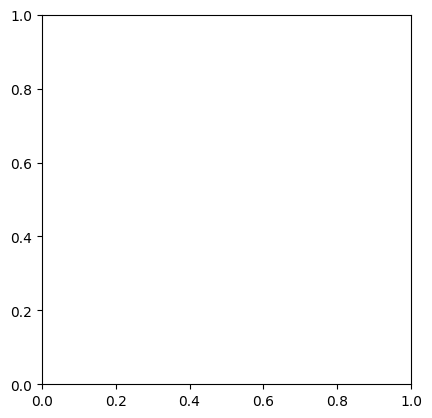

In [7]:
import h5py

def find_datasets_with_label(h5_file):
    def check_for_label(name, obj):
        if isinstance(obj, h5py.Dataset) and 'slice' in name:
            print("Group:", obj.parent.name)
            print("Dataset:", name)
            print("Shape:", obj.shape)
            print()

    h5_file.visititems(check_for_label)

# Ruta del archivo HDF5
file_path = '/wclustre/novapro/R20-11-25-prod5.1reco.j_fullset/FD-Nominal-FHC-Nonswap/fardet_genie_N1810j0211a_nonswap_genierw_fhc_v08_1000_r00032947_s49_c000_R20-11-25-prod5.1reco.l_v1_20211112_171447_sim.h5caf.h5'

with h5py.File(file_path, "r") as h5_file:
    find_datasets_with_label(h5_file)


Group: /rec.energy.nue
Dataset: rec.energy.nue/rawgevslice
Shape: (2968, 1)

Group: /rec.sel.nuecosrej
Dataset: rec.sel.nuecosrej/hitsperplaneasymmslice
Shape: (2968, 1)

Group: /rec.sel.nuecosrej
Dataset: rec.sel.nuecosrej/musliceidxbydist
Shape: (2968, 1)

Group: /rec.sel.nuecosrej
Dataset: rec.sel.nuecosrej/musliceidxbytime
Shape: (2968, 1)

Group: /rec.sel.nuecosrej
Dataset: rec.sel.nuecosrej/sparsenessasymmslice
Shape: (2968, 1)

Group: /rec.sel.nuone
Dataset: rec.sel.nuone/rawgevslice
Shape: (2968, 1)

Group: /rec.sel.nuone_opphorn
Dataset: rec.sel.nuone_opphorn/rawgevslice
Shape: (2968, 1)

Group: /rec.sel.slicelid
Dataset: rec.sel.slicelid/batch
Shape: (2968, 1)

Group: /rec.sel.slicelid
Dataset: rec.sel.slicelid/cosmicid
Shape: (2968, 1)

Group: /rec.sel.slicelid
Dataset: rec.sel.slicelid/cycle
Shape: (2968, 1)

Group: /rec.sel.slicelid
Dataset: rec.sel.slicelid/evt
Shape: (2968, 1)

Group: /rec.sel.slicelid
Dataset: rec.sel.slicelid/ncid
Shape: (2968, 1)

Group: /rec.sel.slic